In [1]:
import scanpy as sc
import numpy as np
from scipy import sparse
import pandas as pd

In [2]:
adata=sc.read_h5ad('151673.h5ad')
adata

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [19]:
data=adata.X.toarray().T
df = pd.DataFrame(data,index=adata.var_names,columns=adata.obs_names)
df

,AAACAAGTATCTCCCA-1,AAACAATCTACTAGCA-1,AAACACCAATAACTGC-1,AAACAGAGCGACTCCT-1,AAACAGCTTTCAGAAG-1,AAACAGGGTCTATATT-1,AAACAGTGTTCCTGGG-1,AAACATTTCCCGGATT-1,AAACCCGAACGAAATC-1,AAACCGGGTAGGTACC-1,...,TTGTGTATGCCACCAA-1,TTGTGTTTCCCGAAAG-1,TTGTTAGCAAATTCGA-1,TTGTTCAGTGTGCTAC-1,TTGTTGTGTGTCAAGA-1,TTGTTTCACATCCAGG-1,TTGTTTCATTAGTCTA-1,TTGTTTCCATACAACT-1,TTGTTTGTATTACACG-1,TTGTTTGTGTAAATTC-1
MIR1302-2HG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC233755.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC240274.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC213203.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df.to_csv('./spark_count_matrix.csv')


In [21]:
data_spatial=adata.obsm['spatial']
df_spatial = pd.DataFrame(data_spatial,index=adata.obs_names,columns=['x','y'])
df_spatial

,x,y
AAACAAGTATCTCCCA-1,9791,8468
AAACAATCTACTAGCA-1,5769,2807
AAACACCAATAACTGC-1,4068,9505
AAACAGAGCGACTCCT-1,9271,4151
AAACAGCTTTCAGAAG-1,3393,7583
...,...,...
TTGTTTCACATCCAGG-1,5653,9396
TTGTTTCATTAGTCTA-1,4825,9630
TTGTTTCCATACAACT-1,4631,7831
TTGTTTGTATTACACG-1,5571,11193


In [22]:
df_spatial.to_csv('./spark_spatial.csv')

Then we use "svg_pre_processing_step2.R" to extract the first 3000 SVGs using Spark.

After executing this file, proceed to execute the following Python code.

In [12]:
gene=[]
for line in open('./gene_spark.csv','r',encoding='utf-8'):
    gene.append(line.strip())
gene=gene[1:]
gene

['ISG15',
 'VWA1',
 'GABRD',
 'KCNAB2',
 'RPL22',
 'ACOT7',
 'VAMP3',
 'CLSTN1',
 'EFHD2',
 'PADI2',
 'CAMK2N1',
 'PINK1',
 'ID3',
 'RPL11',
 'NIPAL3',
 'CLIC4',
 'MAN1C1',
 'STMN1',
 'HMGN2',
 'WASF2',
 'ATP5IF1',
 'LAPTM5',
 'FABP3',
 'COL16A1',
 'PTP4A2',
 'HPCA',
 'PHC2',
 'NCDN',
 'MAP7D1',
 'C1orf122',
 'COL9A2',
 'RIMS3',
 'YBX1',
 'TMEM125',
 'PTPRF',
 'IPO13',
 'RPS8',
 'PRDX1',
 'UQCRH',
 'FAAH',
 'ELAVL4',
 'RNF11',
 'TMEM59',
 'DHCR24',
 'PLPP3',
 'NFIA',
 'DNAJC6',
 'AK5',
 'TTLL7',
 'LMO4',
 'LRRC8D',
 'BTBD8',
 'RPL5',
 'STXBP3',
 'PSRC1',
 'SORT1',
 'SLC6A17',
 'KCNA2',
 'RAP1A',
 'RHOC',
 'ATP1A1',
 'PHGDH',
 'TXNIP',
 'SV2A',
 'CERS2',
 'MLLT11',
 'S100A10',
 'S100A11',
 'S100A16',
 'S100A13',
 'S100A1',
 'RPS27',
 'ADAM15',
 'EFNA1',
 'MUC1',
 'LMNA',
 'C1orf61',
 'HAPLN2',
 'BCAN',
 'CRABP2',
 'CADM3',
 'TAGLN2',
 'KCNJ10',
 'PEA15',
 'ADAMTS4',
 'PCP4L1',
 'RGS4',
 'MGST3',
 'ATP1B1',
 'GLUL',
 'ARPC5',
 'B3GALT2',
 'NEK7',
 'ARL8A',
 'NFASC',
 'TMCC2',
 'CDK18',
 

In [13]:
adata_=sc.read_h5ad('151673.h5ad')
adata_

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [14]:
adata_.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.4', 'AL732372.1', 'OR4F29', 'AC114498.1',
       ...
       'AC007325.2', 'BX072566.1', 'AL354822.1', 'AC023491.2', 'AC004556.1',
       'AC233755.2', 'AC233755.1', 'AC240274.1', 'AC213203.1', 'FAM231C'],
      dtype='object', length=33538)

In [15]:
adata_svg = adata_[:,gene]
adata_svg

View of AnnData object with n_obs × n_vars = 3639 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'Region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [27]:
#test
# show genes 
gene_list = list(adata_svg.var_names)
# 5 top gene
gene_list_top = gene_list[0:10]

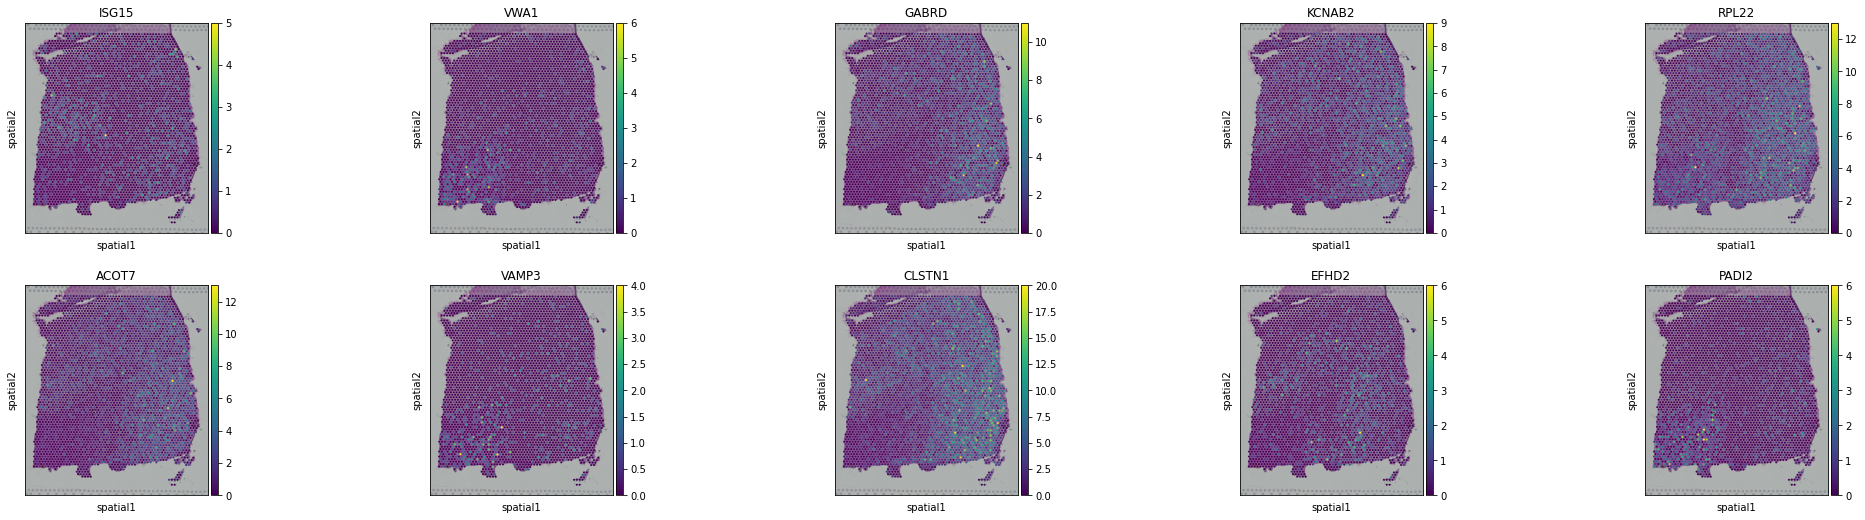

In [28]:
sc.pl.spatial(adata_svg,color=gene_list_top,ncols=5)

In [29]:
'MOBP' in adata_svg.var_names

True

In [30]:
'PLP1' in adata_svg.var_names

True

In [31]:
adata_svg.write_h5ad('./dlpfc_svg/151673_svg.h5ad')

In [65]:
name='151676'
adata_=sc.read_h5ad(f'{name}.h5ad')
adata_

AnnData object with n_obs × n_vars = 3460 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [66]:
adata_svg = adata_[:,gene]
adata_svg

View of AnnData object with n_obs × n_vars = 3460 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'Region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [64]:
adata_svg.write_h5ad(f'./dlpfc_svg/{name}_svg.h5ad')